# importing libraries

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# loading dataset

In [6]:
data = pd.read_csv('titanic_data.csv')

In [ ]:
data.head(10)


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

# numerical value analysis

In [ ]:
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot = True)

# sibsp - number of siblings/spousers abroad the titanic

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data['SibSp'].nunique()

7

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

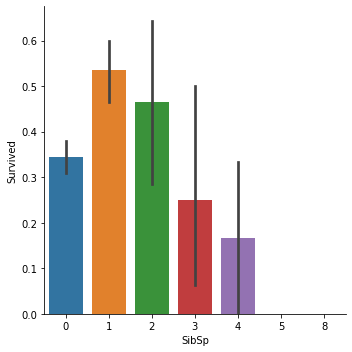

In [24]:
sns.factorplot(x = 'SibSp',y = 'Survived',data = data,kind = 'bar')

# age

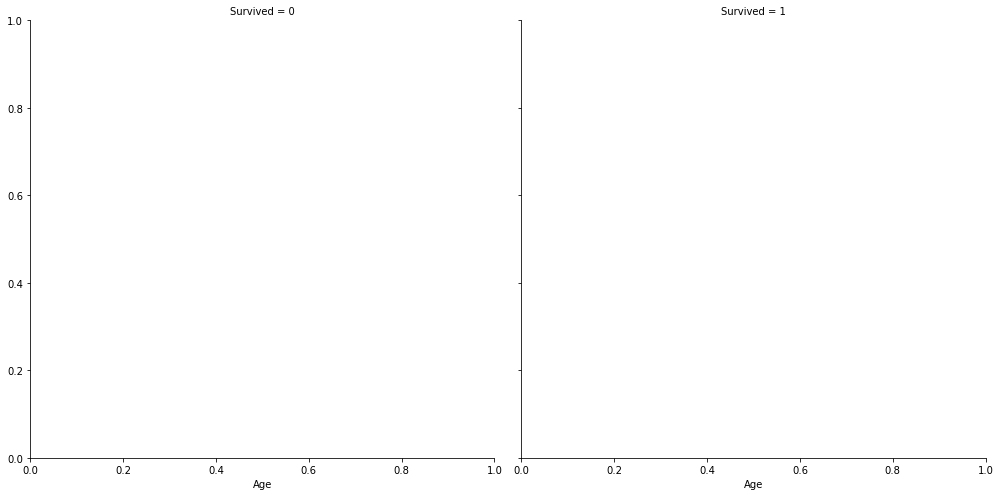

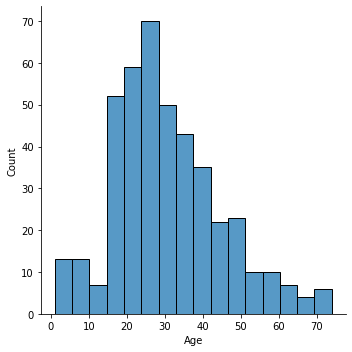

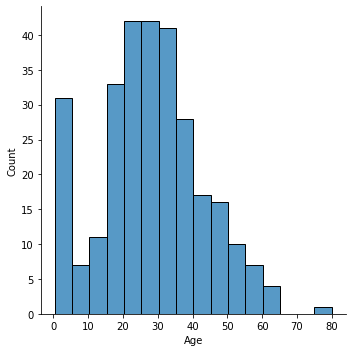

In [25]:
age_visual = sns.FacetGrid(data, col = "Survived",size = 7)
age_visual = age_visual.map(sns.displot,"Age")


# gender

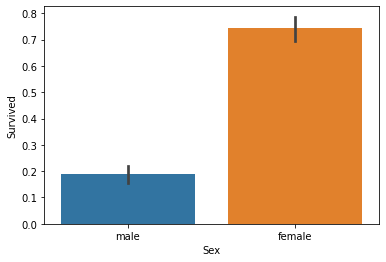

In [17]:
age_plot = sns.barplot(x = 'Sex',y="Survived",data=data)

In [18]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


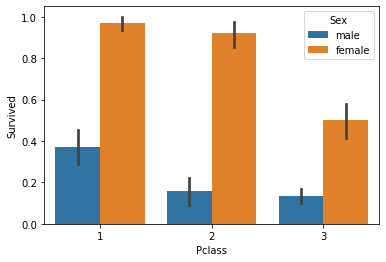

In [22]:
age_plot = sns.barplot(x = 'Pclass',y="Survived",data=data,hue = "Sex")

# embarked

In [26]:
data["Embarked"].isnull().sum()

2

In [28]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data["Embarked"] = data["Embarked"].fillna("S")

In [30]:
data["Embarked"].isnull().sum()

0

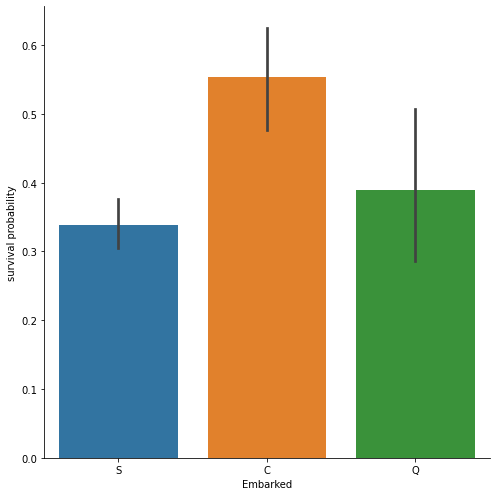

In [32]:
g = sns.factorplot(x = "Embarked",y = "Survived",data = data,size = 7,kind = "bar")
g = g.set_ylabels("survival probability")

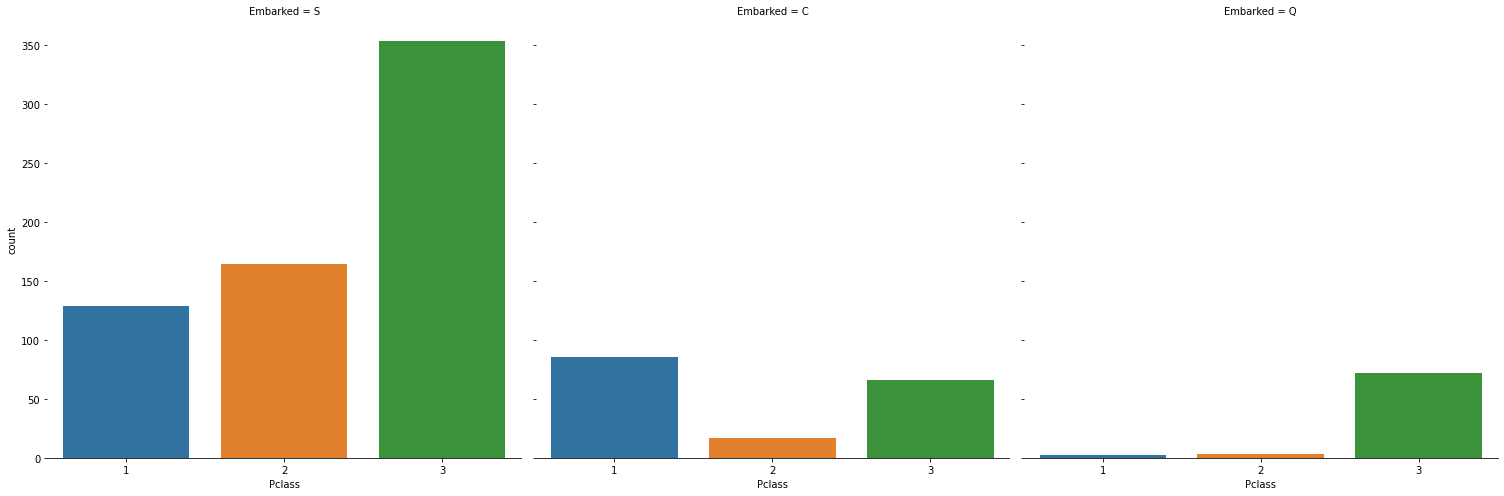

In [33]:
g = sns.factorplot("Pclass",col = "Embarked",data = data,size = 7,kind = "count")
g.despine(left = True)
g = g.set_ylabels("count")

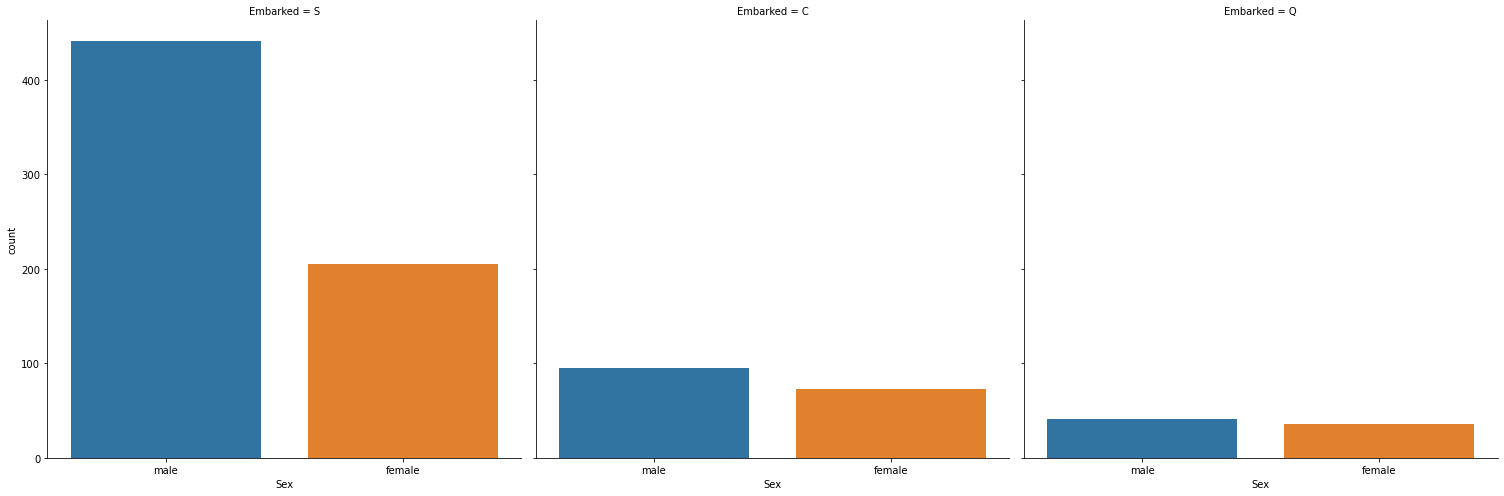

In [34]:
g = sns.factorplot("Sex",col = "Embarked",data=data,size = 7,kind = "count")

# Preparing data

In [35]:
data = pd.read_csv('titanic_data.csv')

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

In [40]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [43]:
rand_age = np.random.randint(mean-std , mean+std, size = is_null)

In [44]:
rand_age

array([28, 27, 30, 23, 24, 17, 36, 40, 21, 15, 32, 32, 39, 42, 38, 38, 25,
       34, 32, 15, 26, 31, 43, 43, 22, 17, 28, 31, 24, 20, 18, 21, 20, 19,
       41, 20, 34, 23, 42, 16, 28, 20, 43, 23, 19, 17, 30, 24, 23, 35, 33,
       22, 36, 15, 35, 38, 40, 21, 39, 37, 20, 26, 19, 35, 43, 43, 22, 18,
       34, 23, 39, 28, 42, 23, 18, 20, 22, 43, 29, 23, 36, 35, 42, 34, 16,
       17, 25, 19, 26, 20, 24, 15, 41, 32, 29, 22, 42, 32, 20, 33, 39, 39,
       34, 17, 34, 43, 43, 39, 39, 23, 19, 39, 34, 16, 39, 34, 16, 22, 25,
       18, 41, 19, 28, 40, 40, 40, 24, 30, 20, 20, 35, 21, 36, 37, 34, 19,
       26, 29, 17, 42, 34, 35, 23, 43, 30, 19, 30, 41, 27, 38, 34, 34, 18,
       28, 38, 37, 36, 24, 41, 17, 32, 24, 22, 16, 39, 35, 27, 43, 25, 19,
       27, 43, 32, 39, 31, 19, 39])

In [51]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data["Age"] = a

In [52]:
data["Age"].isnull().sum()

0

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
data["Embarked"] = data["Embarked"].fillna("S")

In [55]:
col_to_drop = ["PassengerId","Cabin","Ticket","Name"]
data.drop(col_to_drop,axis = 1,inplace = True)

In [56]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
gender = {"male" : 0,"female":1}
data['Sex'] = data['Sex'].map(gender)

In [59]:
ports = {"S" :0 ,"C":1,"Q":2}
data['Embarked'] = data['Embarked'].map(ports)

# splitting the data

In [60]:
x = data.drop(data.columns[[0]],axis=1)
y = data['Survived']

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 0)

# scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# classification

In [71]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [72]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [74]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)


In [75]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(ytest,logreg_ypred)
svc_classifier_acc = accuracy_score(ytest,svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest,dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest,knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest,rf_classifier_ypred)


In [77]:
print("Logistic Regression : ", round(logreg_acc*100,2))
print("Support Vector      : ",round(svc_classifier_acc*100,2))
print("Decision Tree       : ",round(dt_classifier_acc*100,2))
print("K-NN Classifier     : ",round(knn_classifier_acc*100,2))
print("Random Forest      : ",round(rf_classifier_acc*100,2))

Logistic Regression :  80.97
Support Vector      :  81.34
Decision Tree       :  76.12
K-NN Classifier     :  80.97
Random Forest      :  81.72
